In [1]:
%reload_ext autoreload
%autoreload 2

## Script

### Initialize, train and test function

In [80]:
from npfd.models.base import HiddenMarkovModel

def train_evaluate(X_train, X_val, y_train, y_val, 
                   X_adapt, X_test, y_adapt, y_test, 
                   gaussian_duplication_times=5,
                   **kwargs):
    
    run = client.set_experiment_run(desc=EXPERIMENT_DESCRIPTION)
    run.log_hyperparameters(kwargs)

    model = HiddenMarkovModel()
    model.initialize(X_train, init_method='HCompV', **kwargs)

    model.train(X_train, y_train, **kwargs)

    for i in range(1, gaussian_duplication_times+1):
        model.edit([f'MU {2**i} {{*.state[2-4].mix}}'])
        model.train(X_train, y_train, **kwargs)

    model.adapt(X_adapt, y_adapt, gaussian_duplication_times=gaussian_duplication_times, **kwargs)

    results = model.test(X_test, y_test, **kwargs)

    try:
        score = results['WORD_Acc']
    except:
        score = -10
    if score < 0:
        score = -10

    run.log_metric('Accuracy', score)

    return results['WORD_Acc']

### Hyperparameter space search

In [69]:
import skopt
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

vf = [0.01, 8] 
mv = [0.01, 8] # Max is 10
wip = [0.0, 8]
gsf = [0, 100]
pt = [100, 1000]
gdt = [7, 8]

space = [skopt.space.Real(vf[0], vf[1], name='variance_floor', prior='uniform'),
         skopt.space.Real(mv[0], mv[1], name='minimum_variance', prior='uniform'),
         skopt.space.Real(wip[0], wip[1], name='word_insertion_penalty', prior='uniform'),
         skopt.space.Real(gsf[0], gsf[1], name='grammar_scale_factor', prior='uniform'),
#          skopt.space.Real(pt[0], pt[1], name='pruning_threshold', prior='log-uniform'),
#          skopt.space.Integer(gdt[0], gdt[1], name='gaussian_duplication_times')
]

@skopt.utils.use_named_args(space)
def objective(**params):
    return -1.0 * train_evaluate(X_train, X_val, y_train, y_val, 
                                 X_adapt, X_test, y_adapt, y_test, 
                                 **params)

In [81]:
from npfd import data

X_train, X_val, y_train, y_val = data.dataset.make_dataset('db2', clean_interim_dir=True)

af = ['20170108', '20170126', '20170324', '20171009', 
      '20170911', '20170326', '20170404', '20170530', 
      '20171021', '20170409', '20170519', '20170223']

X_adapt, X_test, y_adapt, y_test = data.dataset.make_dataset('db3', clean_interim_dir=False, adapt_list=af)

INFO:root:Converting malte-uhma raw files to HTK format ...
INFO:root:Generating script (.scp) files...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Adding deltas and acelerations...
INFO:root:Test files:	31.0
INFO:root:Train files:	315.0
INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...


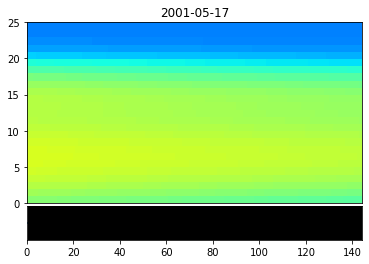

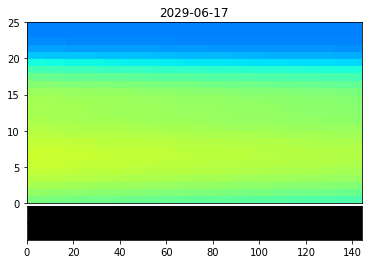

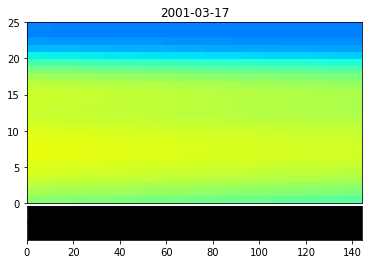

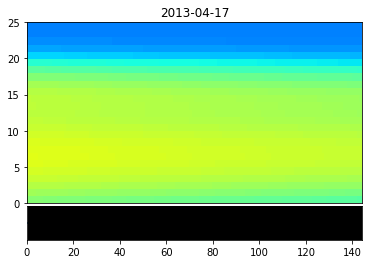

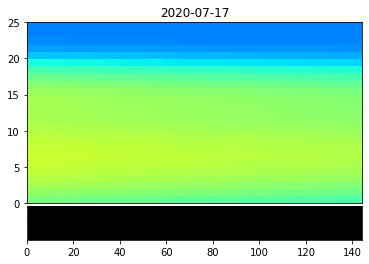

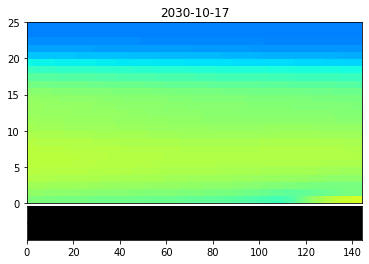

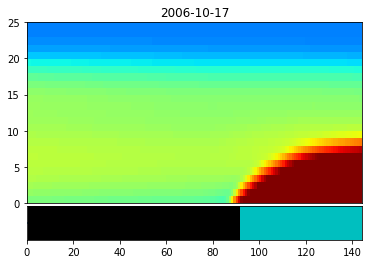

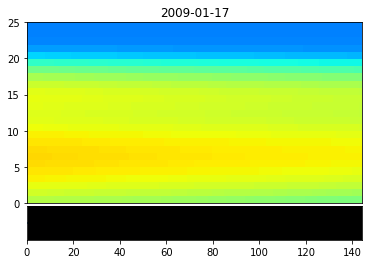

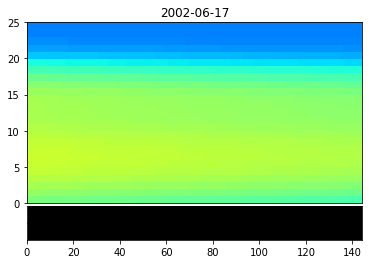

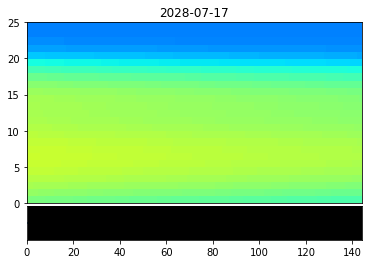

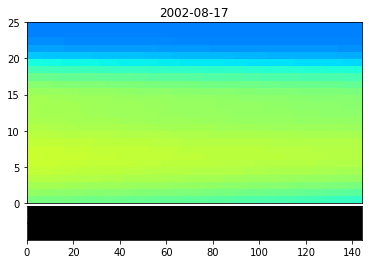

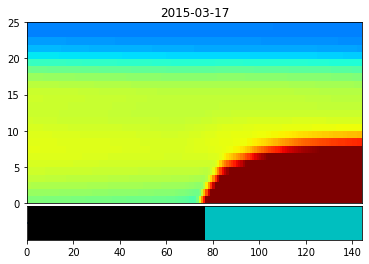

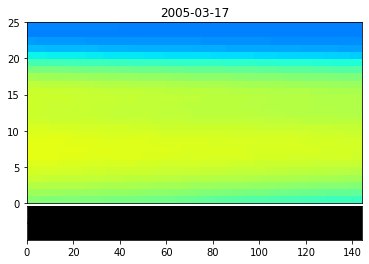

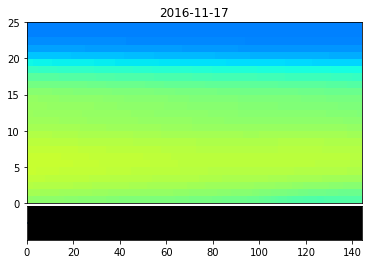

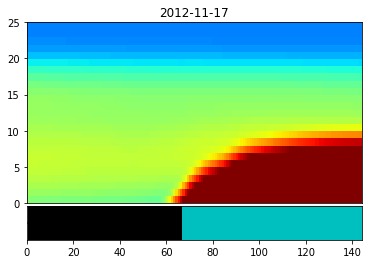

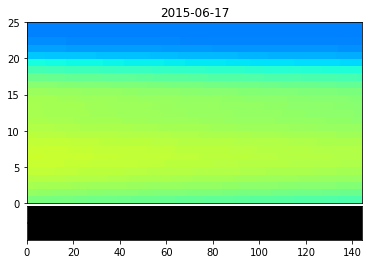

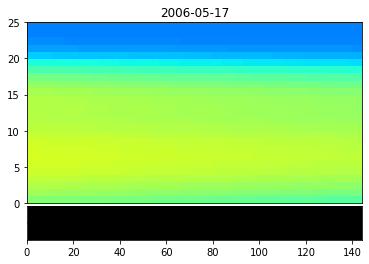

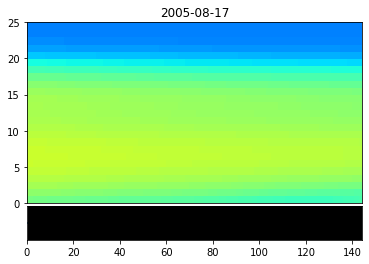

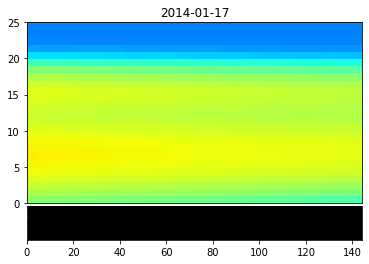

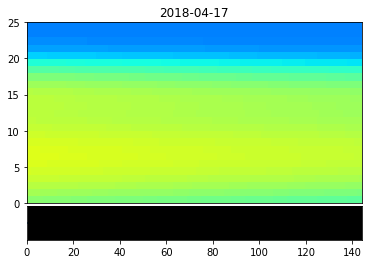

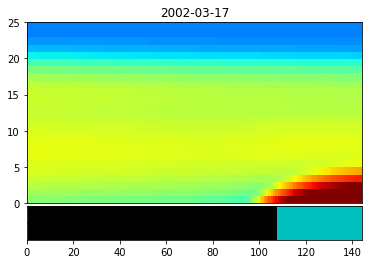

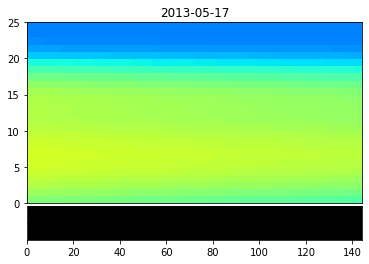

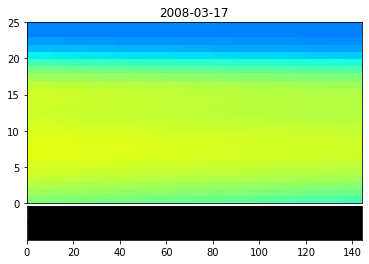

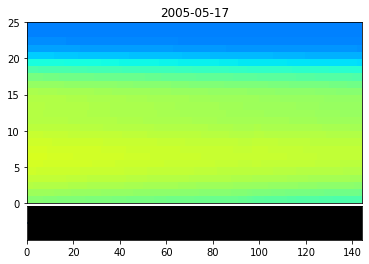

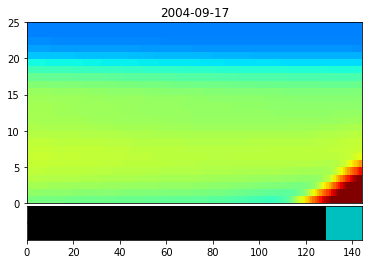

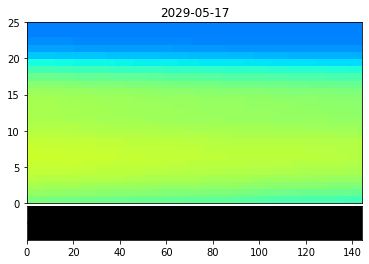

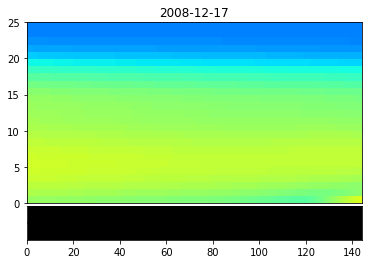

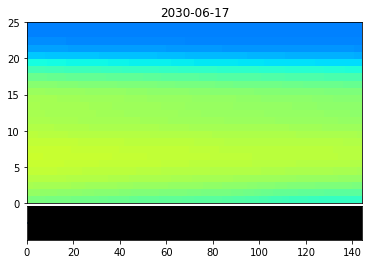

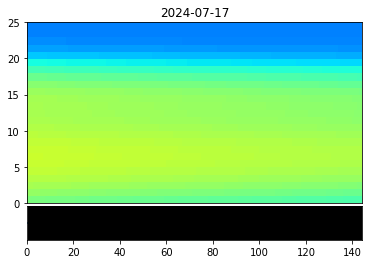

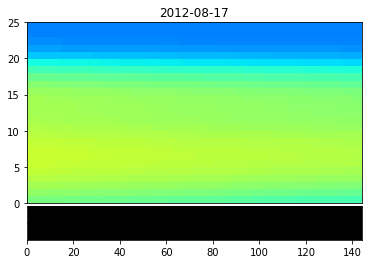

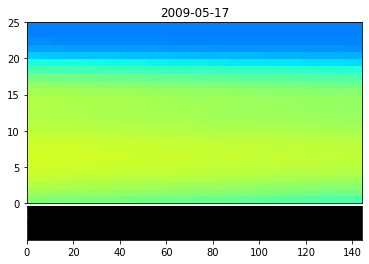

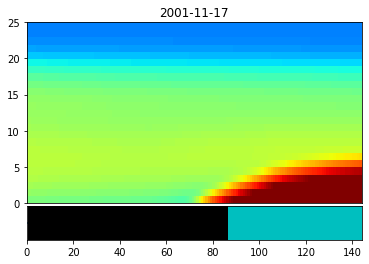

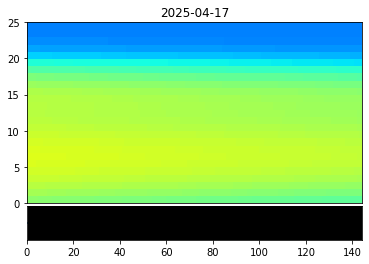

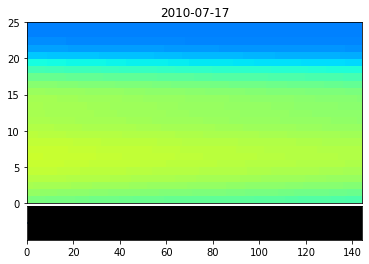

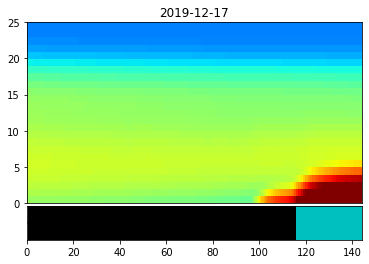

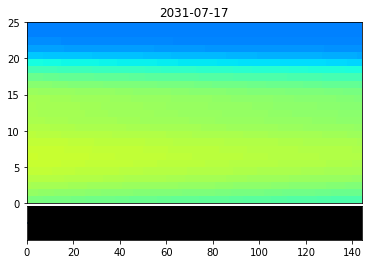

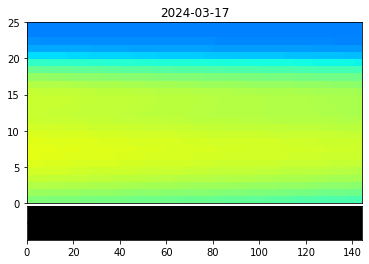

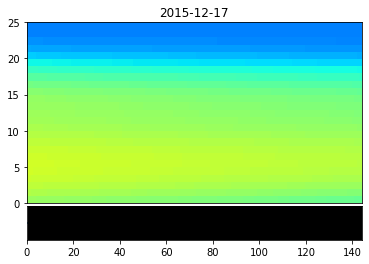

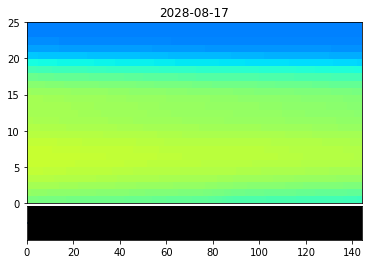

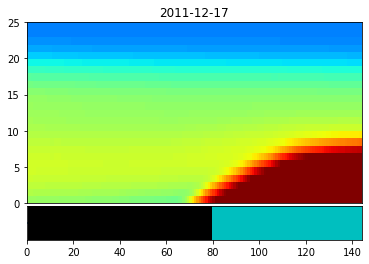

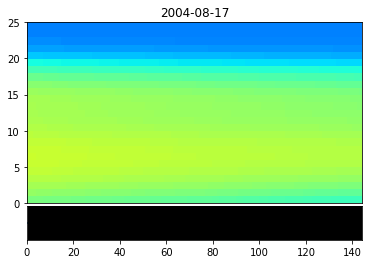

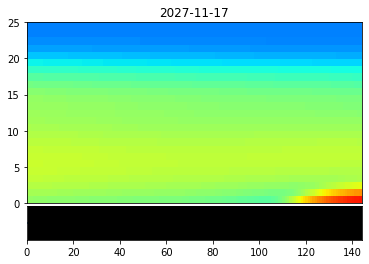

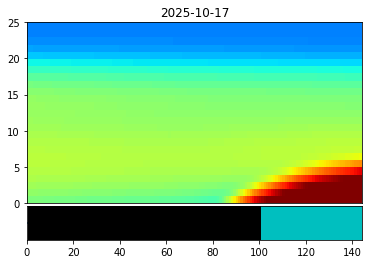

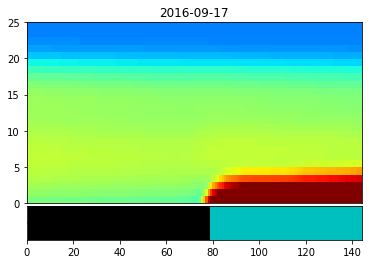

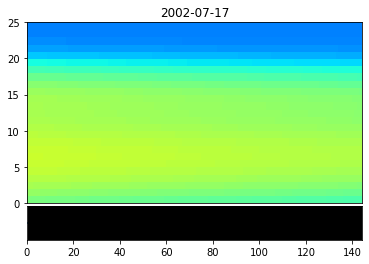

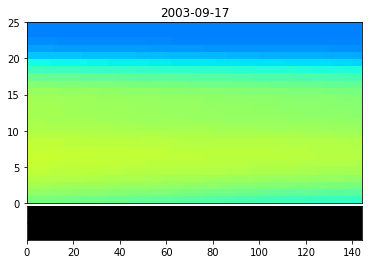

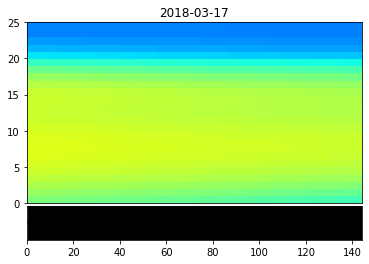

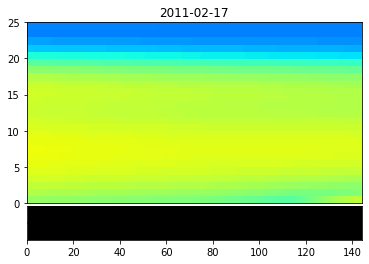

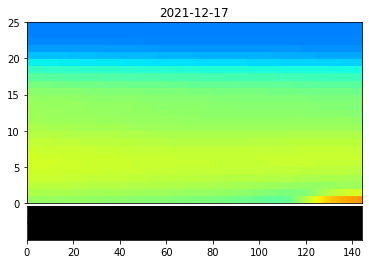

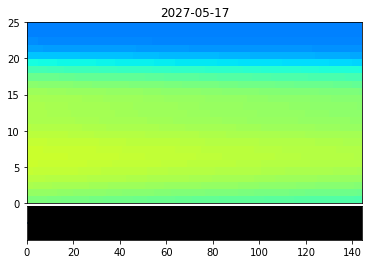

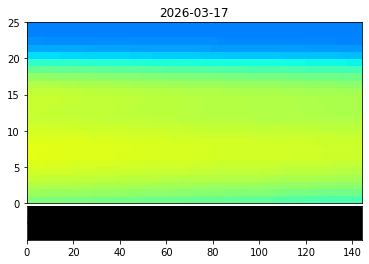

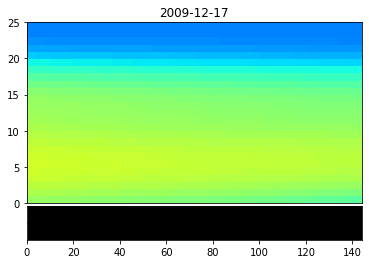

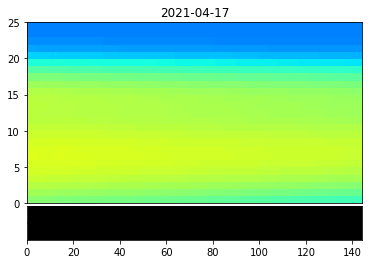

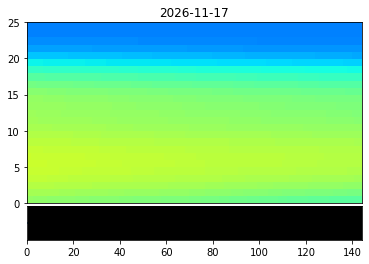

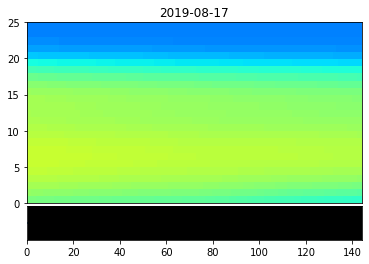

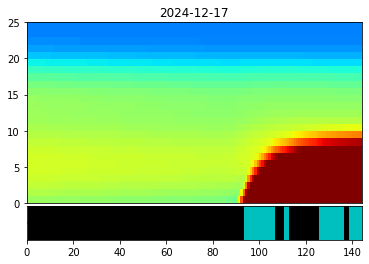

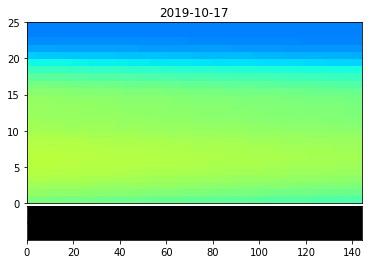

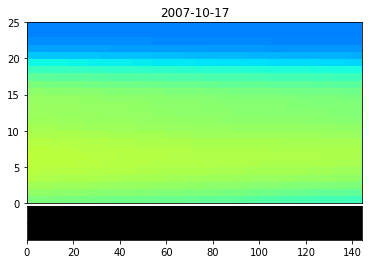

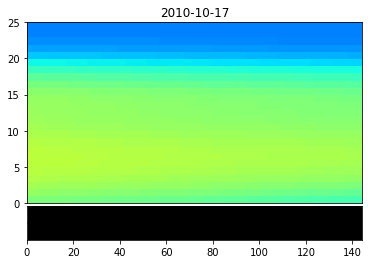

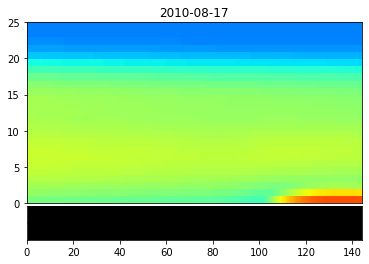

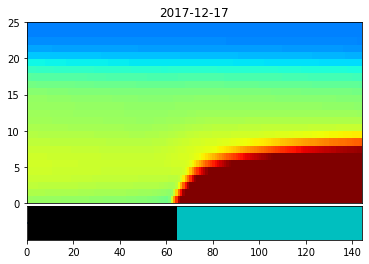

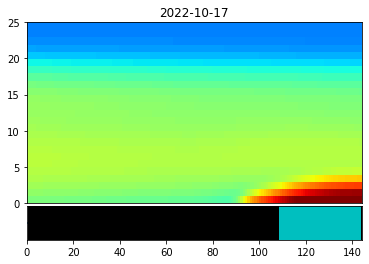

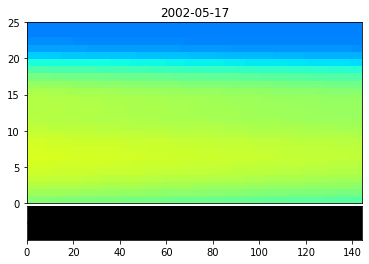

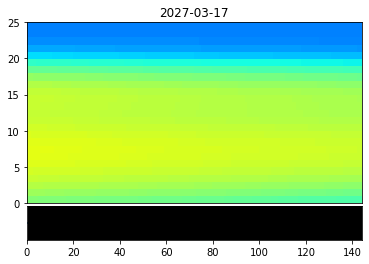

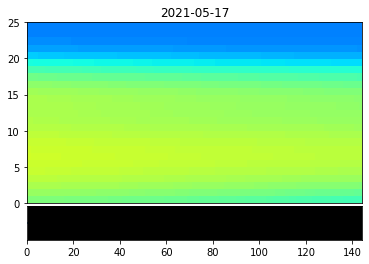

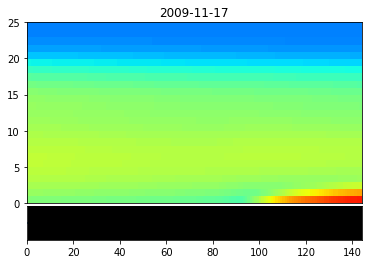

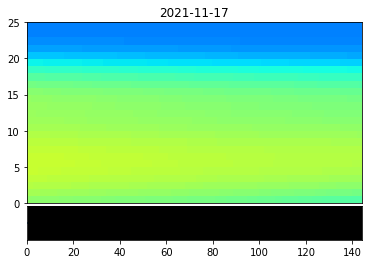

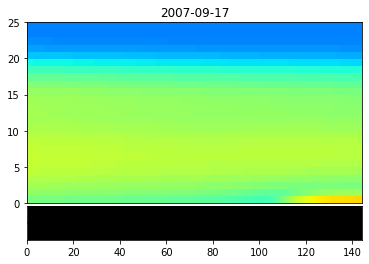

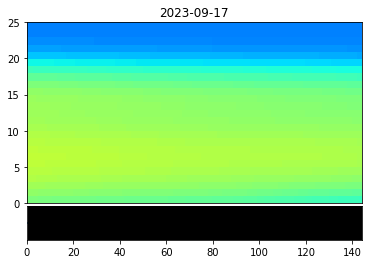

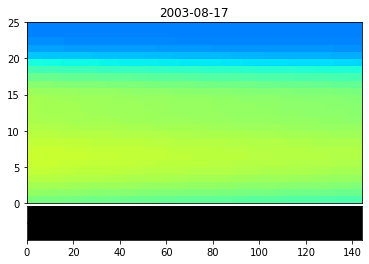

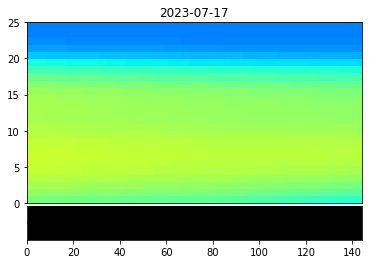

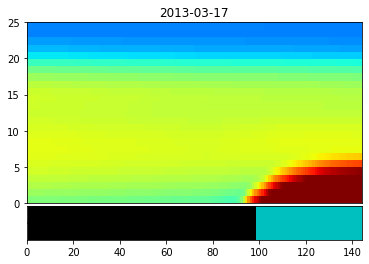

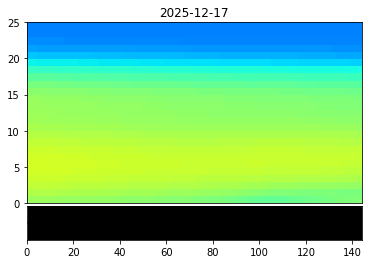

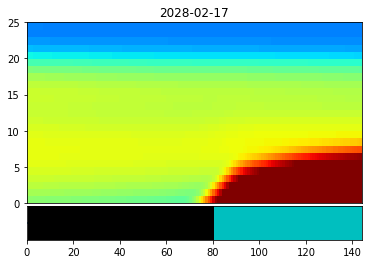

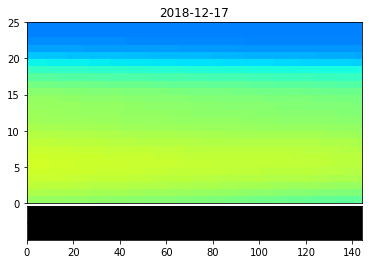

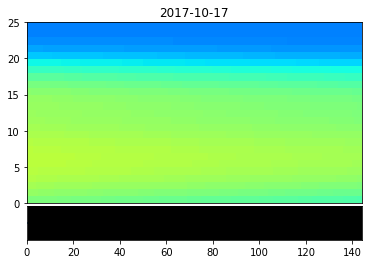

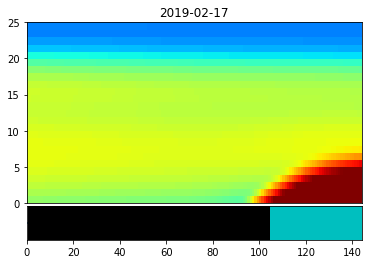

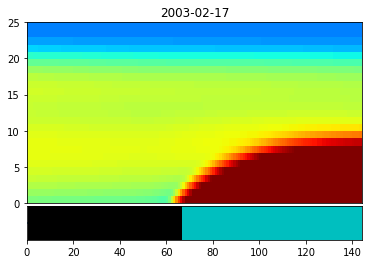

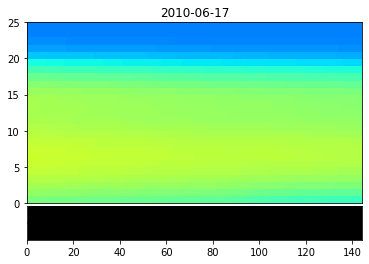

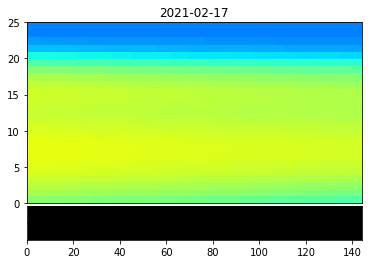

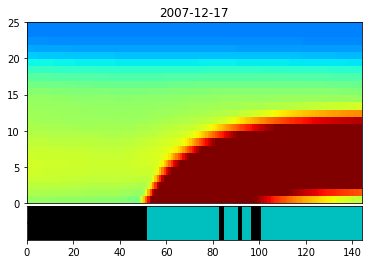

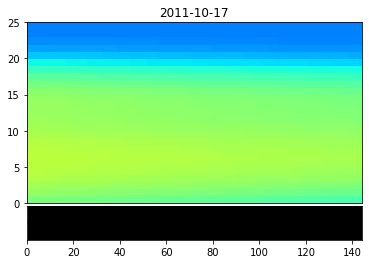

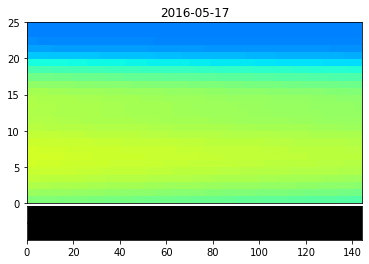

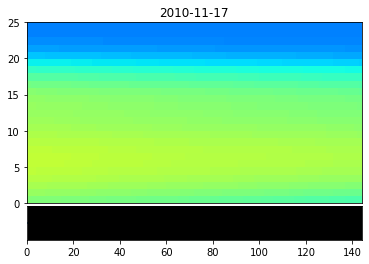

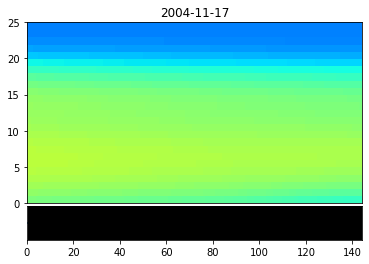

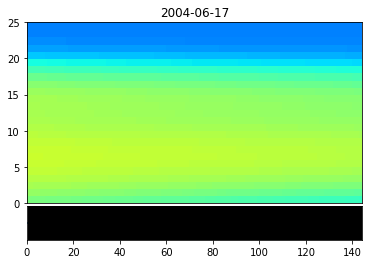

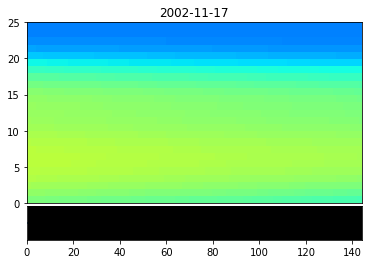

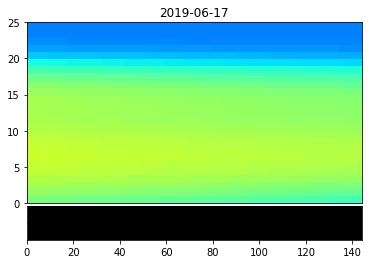

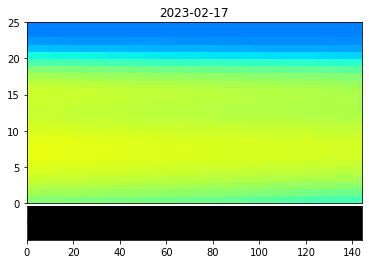

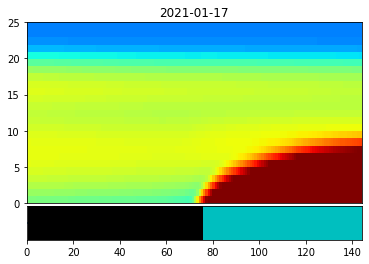

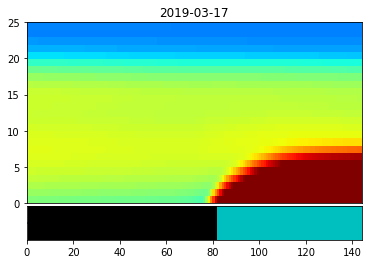

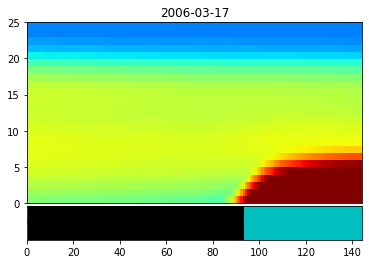

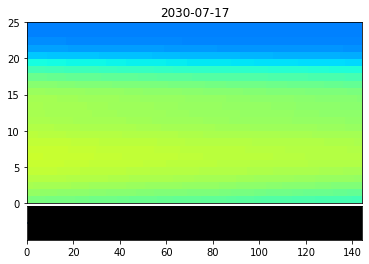

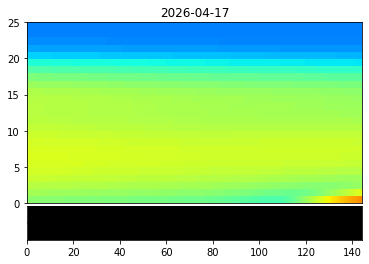

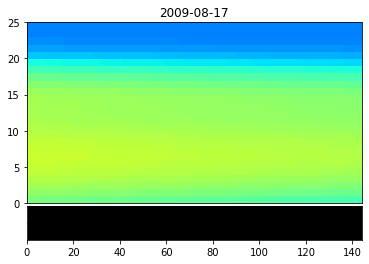

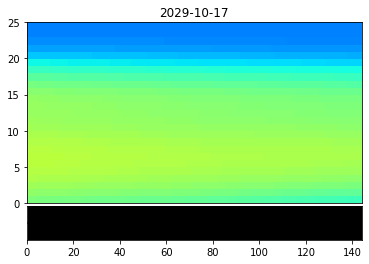

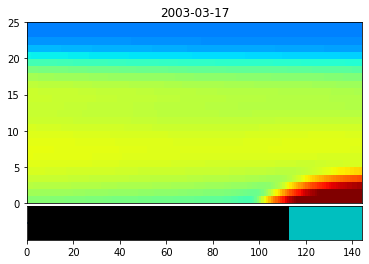

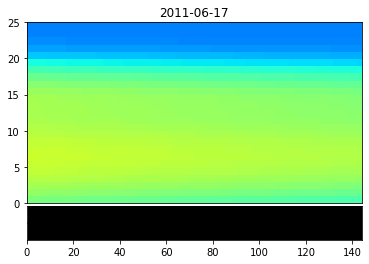

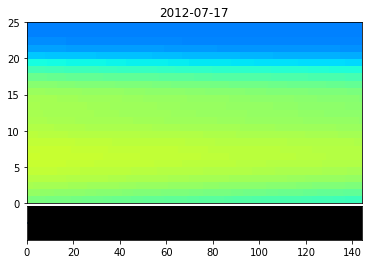

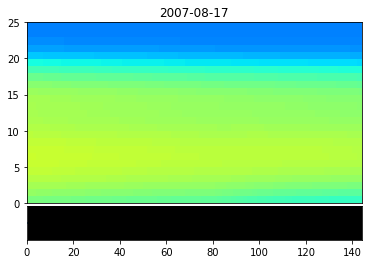

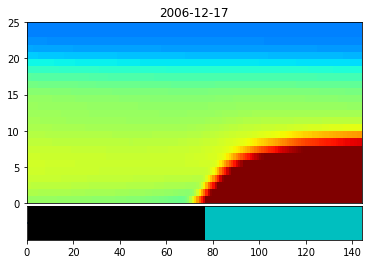

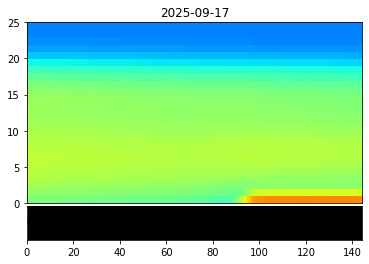

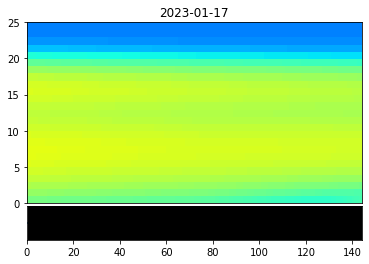

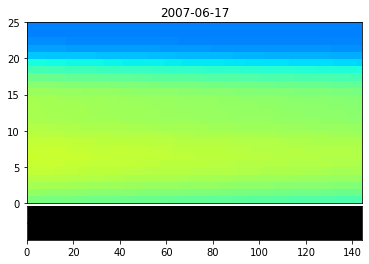

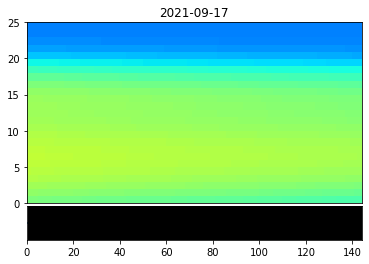

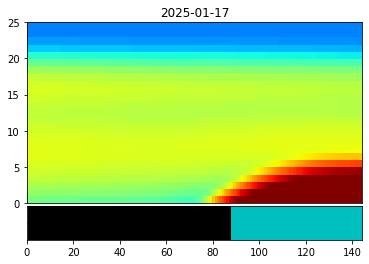

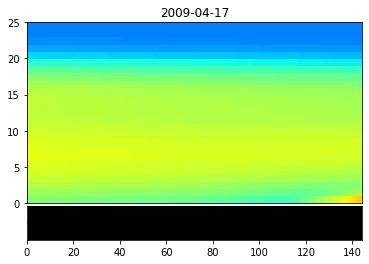

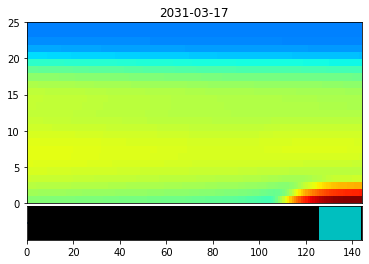

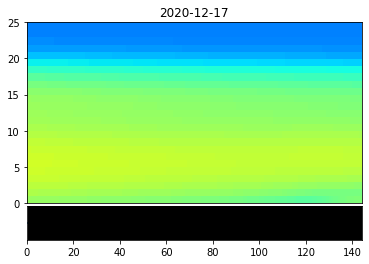

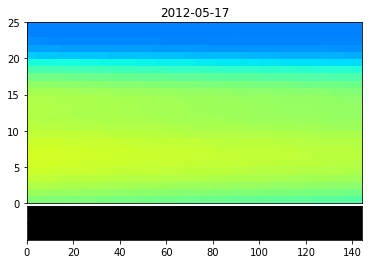

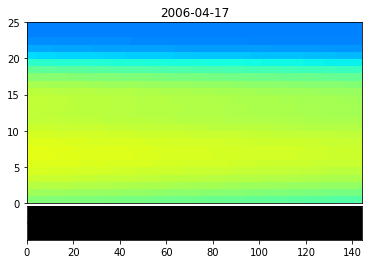

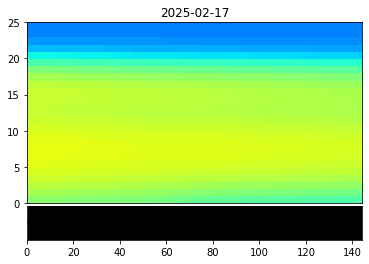

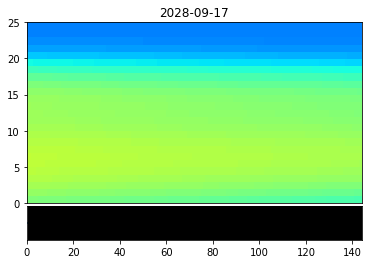

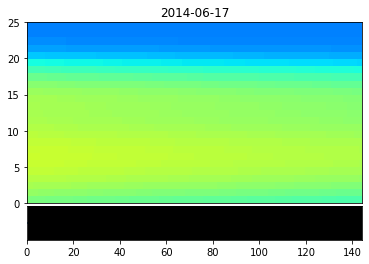

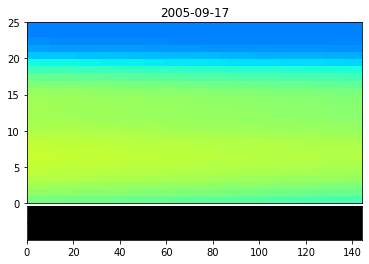

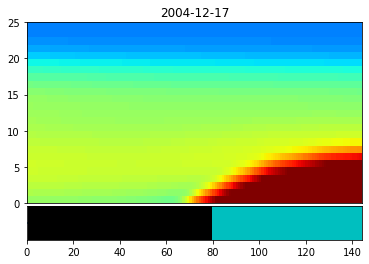

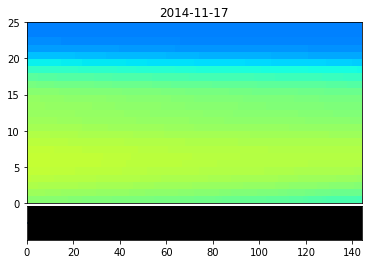

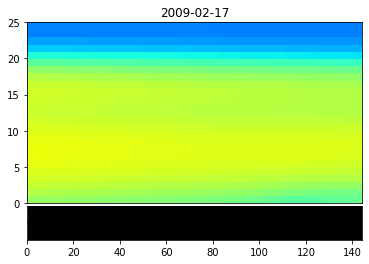

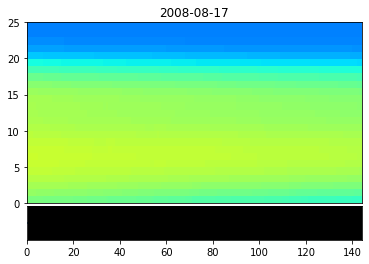

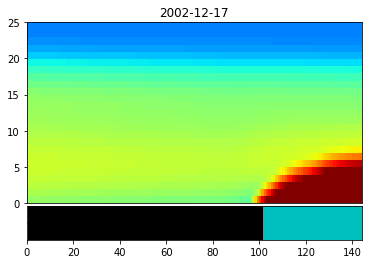

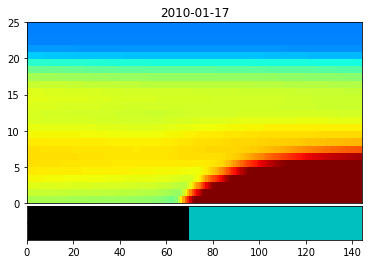

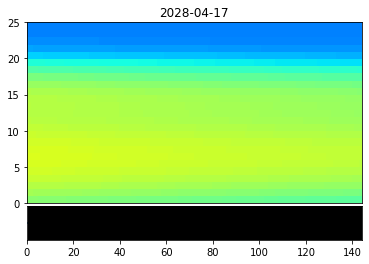

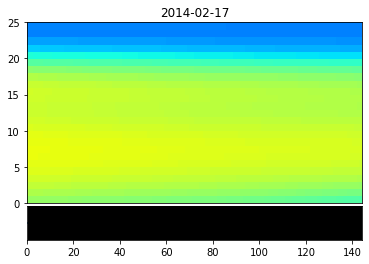

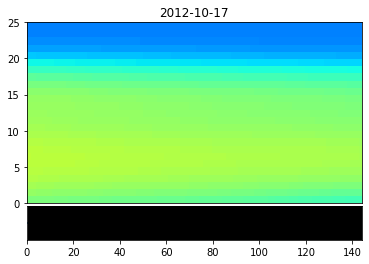

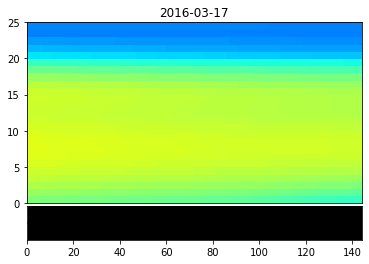

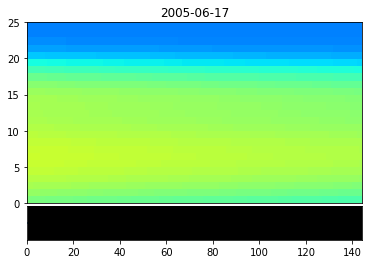

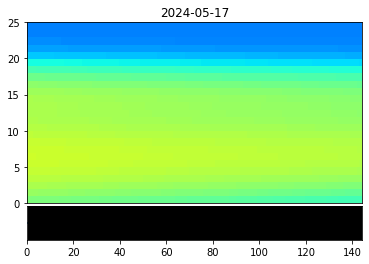

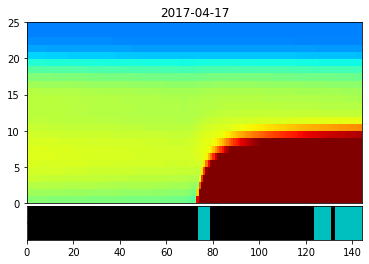

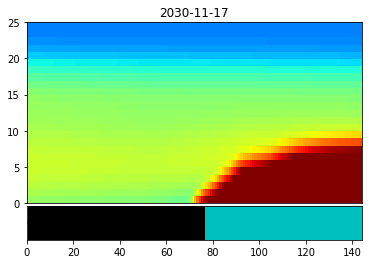

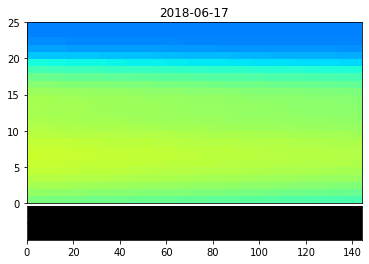

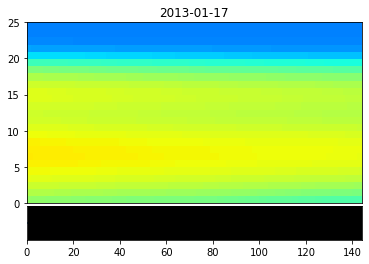

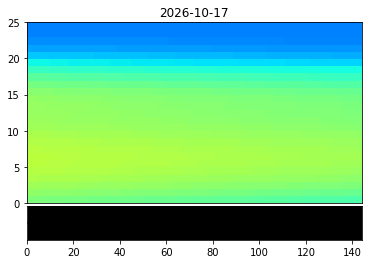

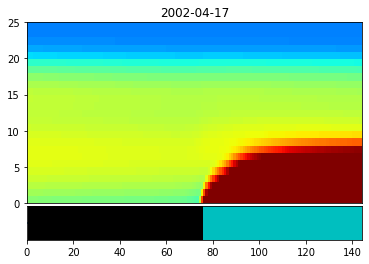

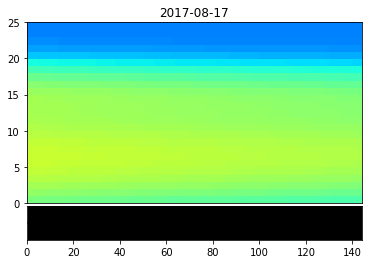

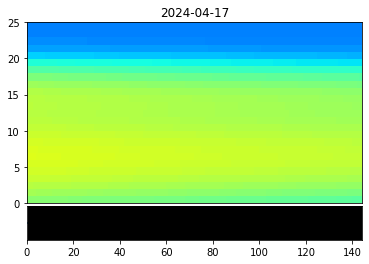

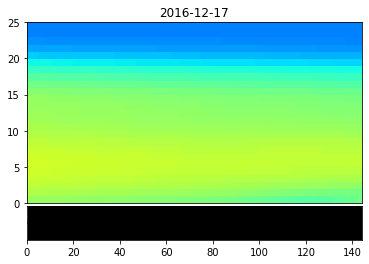

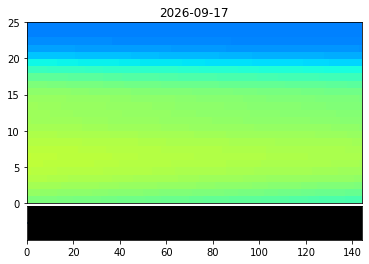

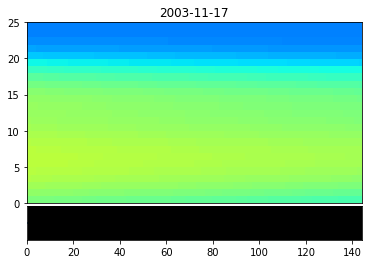

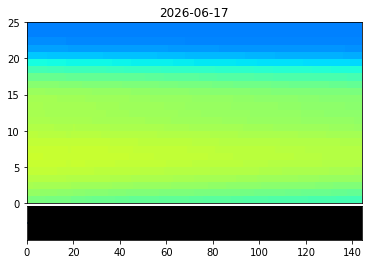

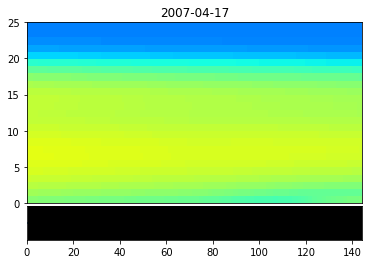

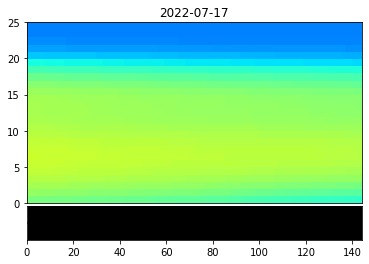

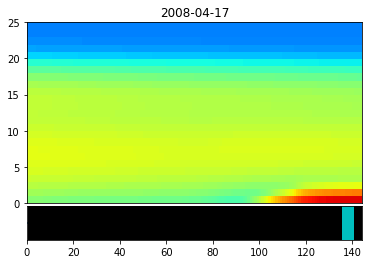

KeyboardInterrupt: 

In [82]:
from npfd import visualization as viz

viz.visualize.generate_plots('real_data', X_train, y_train)

### Set up VertaAI

In [76]:
from verta import Client

HOST = 'http://127.0.0.1:3000'
PROJECT_NAME = "NPF Detector"
EXPERIMENT_NAME = "Synth->adapt. DB1/DB3. 04/07/2021"
EXPERIMENT_DESCRIPTION = f"""
Search space :
- variance_floor={vf[0], vf[1]}
- minimum_variance={mv[0], mv[1]}
- word_insertion_penalty={wip[0], wip[1]}
- grammar_scale_factor={gsf[0], gsf[1]}
- gaussian_duplication_times= {gdt[0], gdt[1]}""" 

client = Client(HOST)
proj = client.set_project(PROJECT_NAME)
expt = client.set_experiment(EXPERIMENT_NAME)

connection successfully established
set existing Project: NPF Detector from personal workspace
created new Experiment: Synth->adapt. DB1/DB3. 04/07/2021


Run the optimizer

In [79]:
results = skopt.gp_minimize(objective, space, n_calls=100)

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


created new ExperimentRun: Run 1220216254536617799368

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1615.502232 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.6178812721 -s 57.9865228549 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:55:00 2

INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1615.482650 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 6.4498555725 -s 78.5047892840 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:55:39 2

INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1615.759420 observations

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 4.9624037993 -s 96.7374025825 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/D

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.194665 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 1.0905140896 -s 31.4432357111 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:56:56 2

INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.969559 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 0.9577821890 -s 94.8427659192 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:57:32 2

INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1615.635366 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 5.4600325610 -s 31.9204701879 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:58:11 2

INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.009418 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 4.3335501439 -s 87.1026411803 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:58:49 2

INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.682960 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 7.8481079855 -s 13.4001801835 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 23:59:26 2

INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.036736 observations



INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 6.9726405107 -s 62.8963634041 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Mon Jul  5 00:00:08 2

INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.874281 observations

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 2.6862100997 -s 78.7571776294 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/D

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc


created new ExperimentRun: Run 1220216254540448681731


INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1615.977556 observations

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 3.0875352915 -s 61.3363506596 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/D

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


created new ExperimentRun: Run 1220216254540876433322

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 15
INFO:root:Editing model 15
INFO:root:Most trained model: 16
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 19
INFO:root:Editing model 19
INFO:root:Most trained model: 20
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 23
INFO:root:Editing model 23
INFO:root:Most trained model: 24
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 27
INFO:root:Adapting model 27


Pruning-On[250.0 150.0 1000.0]



INFO:root:Testing model: 27
INFO:root:Testing real data


  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Attached 384 XFormInfo structures
Attached 384 RegAcc structures
Pruning-On[250.0 150.0 1000.0]
Generating transform 2 (1)
  Using baseclass macro "global" from file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes/global
Estimated XForm 1 using 1616.001154 observations

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/27/hmmdefs -p 6.5987216689 -s 89.5993383844 -A -T 0 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/classes -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/xforms mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet -S /home/gfogwil/D

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...


created new ExperimentRun: Run 1220216254541277040713

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/hyperparameter-search
Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]

Pruning-On[250.0 150.0 1000.0]



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-On[250.0 150.0 1000.0]


Pruning-On[250.0 150.0 1000.0]



KeyboardInterrupt: 

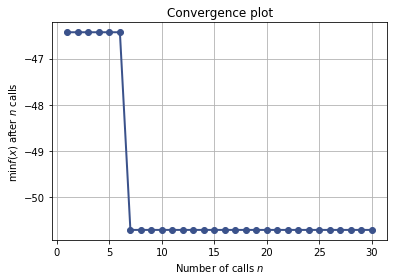

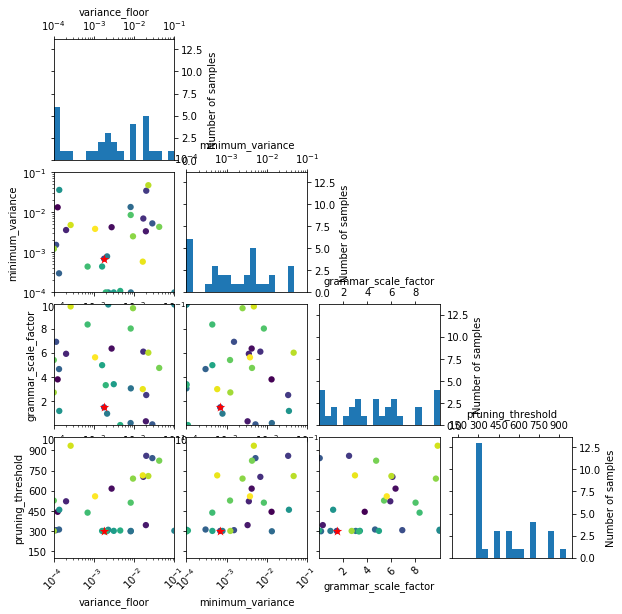

In [58]:
# print("""Best parameters:
# - variance_floor=%.6f
# - minimum_variance=%.6f
# - word_insertion_penalty=%.2f
# - grammar_scale_factor=%.2f
# - pruning_threshold=%.2f
# - gaussian_duplication_times=%d""" % (results.x[0], results.x[1],
#                                       results.x[2], results.x[3],
#                                       results.x[4], results.x[5]))

plot_convergence(results)
plt.show()

skopt.plots.plot_evaluations(results)
plt.show()